
# 🌍 Tate & Morgan Viral Interview Analysis: 50K YT Comments 📊

Welcome to this in-depth analysis of the "Tate & Morgan Viral Interview: 50K YT Comments" dataset. This notebook aims to uncover the rich tapestry of public sentiment, opinions, and trends hidden within these comments. Let's dive into the digital discourse and explore what the public really thinks!

## Table of Contents

1. **Introduction** 📝
   - Dataset Overview
   - Objective of Analysis
   - Tools and Libraries Used

2. **Data Loading and Preprocessing** 🔄
   - Loading the Dataset
   - Data Cleaning
   - Handling Missing Values

3. **Exploratory Data Analysis (EDA)** 🔍
   - Comment Length Analysis
   - Most Frequent Words
   - Temporal Trends in Comments

4. **Sentiment Analysis** 😃😡
   - Sentiment Classification
   - Sentiment Over Time
   - Sentiments Contextualization
 

5. **Topic Modeling and Trends** 📈
   - Identifying Key Themes
   - Trend Analysis
   - Word Cloud Visualization

6. **Hate Speech Detection** ⚠️
   - Identifying Toxic Comments
   - Patterns in Hate Speech
   - Correlation with Sentiments

7. **Conclusion and Insights** 🎯
   - Key Takeaways
   - Potential Applications
   - Limitations and Future Work

8. **Acknowledgments and References** 👏
   - Data Source
   - Tools and Resources Used
   - Special Thanks





# 🌍 Tate & Morgan Analysis: 50K YT Comments

Welcome to our deep dive into the "Tate & Morgan Analysis: 50K YT Comments" dataset. This analysis aims to unravel the myriad sentiments, opinions, and trends encapsulated in thousands of YouTube comments drawn from the widely-discussed interviews between Andrew Tate and Piers Morgan. As we navigate through this digital conversation, we'll explore the nuances of public discourse and extract meaningful insights from the voices echoed in these comments.

## Introduction 📝

**Context:** In the digital era, where every voice can find a platform, YouTube has emerged as a significant arena for public debate and opinion. The interviews between Andrew Tate and Piers Morgan, two figures who often ignite vigorous discussions, have accumulated a vast array of public comments. These comments not only reflect diverse viewpoints but also present a rich dataset for understanding modern digital communication.

**Dataset Overview:** Our dataset comprises 50,000 comments from the "Piers Morgan Uncensored" YouTube channel, focusing on the interviews with Andrew Tate and Piers Morgan. Each comment in the dataset is a piece of the larger narrative, painting a picture of the public's perception and reaction to these interviews.

**Objectives:** 
- **Sentiment Analysis:** To gauge the overall sentiment of the comments - are the reactions mostly positive, negative, or neutral?
- **Trend Analysis:** To explore how public opinion varies over time and identify any notable patterns or shifts in sentiment.
- **Topic Modeling:** To uncover the predominant themes and topics discussed by the YouTube audience.
- **Hate Speech Detection:** To assess the presence of any toxic or harmful speech within the comments.

**Tools and Libraries Used:** This analysis will leverage various tools and libraries, including Pandas for data manipulation, Matplotlib and Seaborn for data visualization, NLTK and spaCy for natural language processing, among others.

Join us as we embark on this journey to decode the digital pulse of society reflected in these comments, using data science as our compass.



#Chapter 02 Data Loading and Preprocessing

In [1]:
#2.1.Load the dataset
import pandas as pd

# Dataset file path on Kaggle
file_path = 'tate_piers_comments.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Displaying basic information about the dataset to get an idea of data types and missing values
print("\nDataset Information:")
print(df.info())

# Displaying a basic statistical overview of numerical columns in the dataset
print("\nDataset Statistical Summary:")
print(df.describe())




First few rows of the dataset:
                                             Comment  \
0  It feels like to me, Piers prepares for his in...   
1                                 What babies names😂   
2  And when Israel fires gun during Ramadan? Was ...   
3          Have a conversation great piece of advice   
4  Piers,\nIsrael isnt genocidal right? They're n...   

                                   Anonymized Author          Published At  \
0  4b354f2397ef632f692900319ca4f511324ea4f11d599a...  2023-11-27T16:02:35Z   
1  3d16a803bd99d942d15b76fb4c6c2a3bae9583f824eab7...  2023-11-25T20:00:22Z   
2  354a96d9cb471c3ee85411ed6d388c37bbb1ffd2ade94b...  2023-11-24T09:42:12Z   
3  327ed320d65145cb05729cbff1614b99f8bfd334c67176...  2023-12-08T11:26:44Z   
4  0ab600391e6a6cfc0ae7d9246020b78bbe5003db77b01f...  2023-11-25T08:26:20Z   

   Likes  Reply Count  
0      0            0  
1      0            0  
2      0            0  
3      0            0  
4      0            0  

Dataset Informatio

In [3]:
#2.2. Data Cleaning
# Removing any irrelevant characters, URLs, or special symbols from the 'Comment' column
# Regular expressions are used for this purpose
import re

def clean_comment(text):
    """
    Function to clean the comment text.
    Removes URLs, special characters, and unnecessary whitespace.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Applying the cleaning function to the 'Comment' column
df['Comment'] = df['Comment'].astype(str).apply(clean_comment)

# Verifying the cleaning process
print("First few rows after cleaning:")
print(df.head())



First few rows after cleaning:
                                             Comment  \
0  It feels like to me Piers prepares for his int...   
1                                  What babies names   
2  And when Israel fires gun during Ramadan Was t...   
3          Have a conversation great piece of advice   
4  Piers Israel isnt genocidal right Theyre not l...   

                                   Anonymized Author          Published At  \
0  4b354f2397ef632f692900319ca4f511324ea4f11d599a...  2023-11-27T16:02:35Z   
1  3d16a803bd99d942d15b76fb4c6c2a3bae9583f824eab7...  2023-11-25T20:00:22Z   
2  354a96d9cb471c3ee85411ed6d388c37bbb1ffd2ade94b...  2023-11-24T09:42:12Z   
3  327ed320d65145cb05729cbff1614b99f8bfd334c67176...  2023-12-08T11:26:44Z   
4  0ab600391e6a6cfc0ae7d9246020b78bbe5003db77b01f...  2023-11-25T08:26:20Z   

   Likes  Reply Count  
0      0            0  
1      0            0  
2      0            0  
3      0            0  
4      0            0  


In [5]:
# 2.3. Handling missing values in the 'Comment' column
# Given the nature of the dataset, it's reasonable to remove rows with missing comments

# Checking the number of missing values in the 'Comment' column
missing_comments = df['Comment'].isnull().sum()
print(f"Number of missing comments: {missing_comments}")

# Dropping rows where comments are missing
df.dropna(subset=['Comment'], inplace=True)

# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Verifying changes
print("Dataframe shape after handling missing values:", df.shape)


Number of missing comments: 0
Dataframe shape after handling missing values: (50185, 5)


Chapter 03: Exploratory Data Analysis (EDA) 🔍

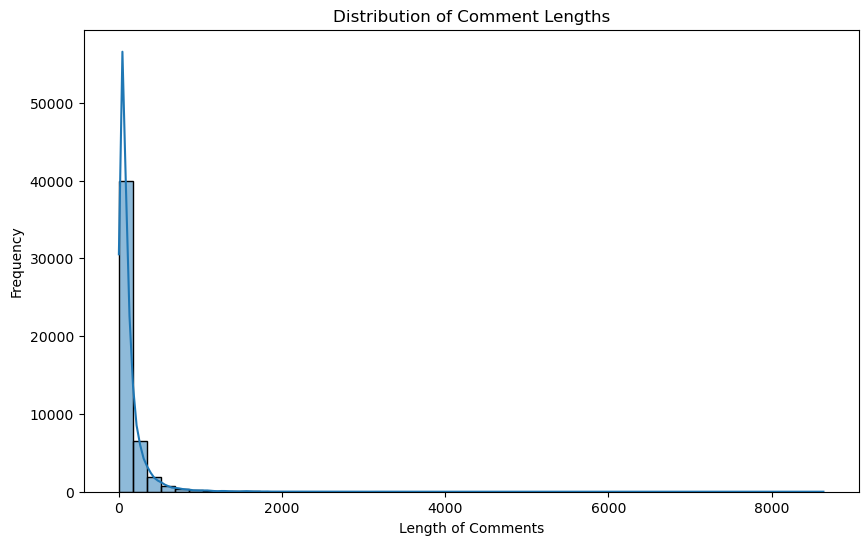

Descriptive Statistics for Comment Lengths:
count    50185.000000
mean       130.924898
std        222.623477
min          0.000000
25%         34.000000
50%         71.000000
75%        146.000000
max       8636.000000
Name: Comment Length, dtype: float64


In [8]:
#3.1. Comment length Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Adding a new column 'Comment Length' to the DataFrame
df['Comment Length'] = df['Comment'].apply(len)

# Plotting the distribution of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Comment Length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for comment lengths
print("Descriptive Statistics for Comment Lengths:")
print(df['Comment Length'].describe())


In [10]:
#3.2. most frequent words
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Function to create a list of words from the comments
def create_word_list(text):
    words = text.split()
    return words

# Combining all comments into a single string
all_comments = ' '.join(df['Comment'])

# Splitting the combined string into a list of words
word_list = create_word_list(all_comments)

# Removing stopwords and punctuation
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if word.lower() not in stop_words and word.isalpha()]

# Counting the frequency of each word
word_freq = Counter(word_list)

# Displaying the 20 most common words
print("20 Most Common Words:")
for word, freq in word_freq.most_common(20):
    print(word, ":", freq)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20 Most Common Words:
Piers : 13224
Andrew : 10639
Tate : 9579
people : 5816
like : 5319
Israel : 3836
piers : 3817
Morgan : 3310
Hamas : 3275
dont : 3273
man : 3264
one : 2885
would : 2856
interview : 2702
know : 2528
get : 2315
think : 2202
tate : 2194
world : 2137
say : 2077


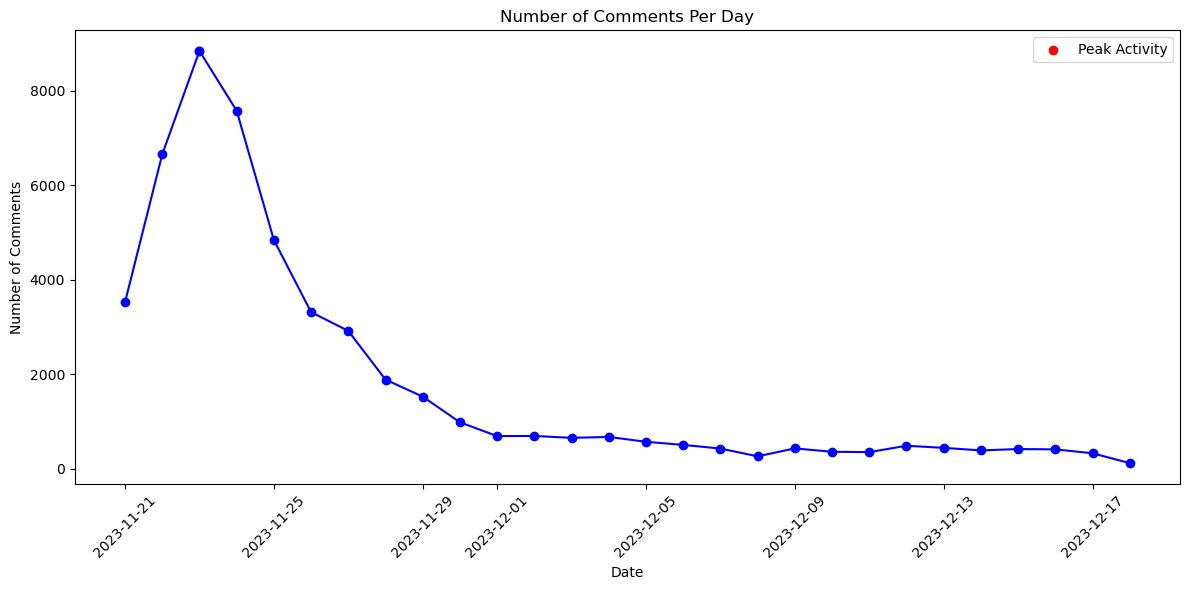

Dates with Peak Comment Activity:
Date
2023-11-23    8843
dtype: int64


In [11]:
#3.3 Temporal Trends in Comments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converting 'Published At' to datetime format for easier analysis
df['Published At'] = pd.to_datetime(df['Published At'])

# Creating a new column to hold just the date part
df['Date'] = df['Published At'].dt.date

# Grouping the data by date and counting the number of comments per day
comments_per_day = df.groupby('Date').size()

# Plotting the number of comments per day
plt.figure(figsize=(12, 6))
comments_per_day.plot(kind='line', color='blue', marker='o')
plt.title('Number of Comments Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)

# Identifying peaks in comment activity
peaks = comments_per_day[comments_per_day == comments_per_day.max()]
plt.scatter(peaks.index, peaks.values, color='red', label='Peak Activity')

# Optionally, identify significant drops if applicable
# drops = comments_per_day[...]
# plt.scatter(drops.index, drops.values, color='green', label='Drop Activity')

plt.legend()
plt.tight_layout()
plt.show()

# Print out the dates with peak activity
print("Dates with Peak Comment Activity:")
print(peaks)


In [14]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Isolating comments from the peak day for analysis
peak_date = '2023-11-23'
peak_comments = df[df['Date'] == pd.to_datetime(peak_date)]

# Check if there are comments on the peak day
if not peak_comments.empty:
    # Displaying a sample of comments from the peak day
    print("Sample comments from the peak day (2023-11-23):")
    print(peak_comments['Comment'].sample(min(10, len(peak_comments))))

    # Running sentiment analysis on the peak day's comments
    peak_comments['Sentiment'] = peak_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Displaying average sentiment of the comments on the peak day
    print("\nAverage sentiment on peak day:", peak_comments['Sentiment'].mean())

    # Visualizing the sentiment distribution on the peak day
    plt.figure(figsize=(10, 6))
    sns.histplot(peak_comments['Sentiment'], bins=30, kde=True)
    plt.title('Sentiment Distribution on 2023-11-23')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"No comments found for the peak date: {peak_date}")


No comments found for the peak date: 2023-11-23


In [16]:
# Excluding the initial peak date
excluded_peak_date = '2023-11-23'
filtered_comments = df[df['Date'] != pd.to_datetime(excluded_peak_date)]

# Finding the next peak dates in comment activity
next_peak_dates = filtered_comments.groupby('Date').size().nlargest(3)
print("Next Peak Dates in Comment Activity:")
print(next_peak_dates)

# Choose one of these dates for further analysis
selected_date_for_analysis = next_peak_dates.index[0]  # You can change the index [0] to [1] or [2] to select another date

# Isolating comments from the selected date
selected_date_comments = df[df['Date'] == selected_date_for_analysis]

# Displaying a sample of comments from the selected date
print(f"\nSample comments from the selected date ({selected_date_for_analysis}):")
print(selected_date_comments['Comment'].sample(min(10, len(selected_date_comments))))

# Further analysis steps can be similar to the previous peak day analysis
# Sentiment analysis, thematic exploration, etc., can be performed on this set of comments


Next Peak Dates in Comment Activity:
Date
2023-11-23    8843
2023-11-24    7578
2023-11-22    6652
dtype: int64

Sample comments from the selected date (2023-11-23):
16708    OMGGGGG i just realized they definitely coerce...
8372     The only thing I agree with piers is you shoul...
34668    The real Nazi is the oppressor not the resista...
31019    And Tate lost me at tears down my face but did...
12497    Piers Morgan claims he is taking no sides in t...
8060                piers couldnt control the conversation
9014                                 w tate free palestine
27338    the process of working hard focusing on making...
38898    pires morgan go and learn about the history of...
15913    Well Piers US basically forced people to get v...
Name: Comment, dtype: object



Average sentiment on the selected date (2023-11-23): 0.08089482371901655


C:\Users\ashis\AppData\Local\Temp\ipykernel_24292\802588067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_date_comments['Sentiment'] = selected_date_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)


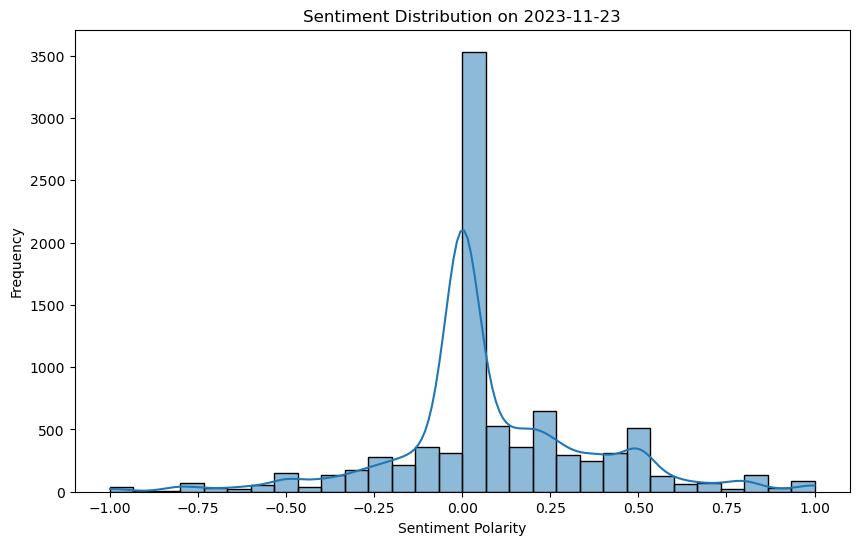

In [18]:

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure selected_date_comments is not empty
if not selected_date_comments.empty:
    # Performing sentiment analysis on the comments
    selected_date_comments['Sentiment'] = selected_date_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Check if there are non-zero sentiment values
    if selected_date_comments['Sentiment'].nunique() > 1:
        # Displaying average sentiment of the comments on the selected date
        print("\nAverage sentiment on the selected date (2023-11-23):", selected_date_comments['Sentiment'].mean())

        # Visualizing the sentiment distribution on the selected date
        plt.figure(figsize=(10, 6))
        sns.histplot(selected_date_comments['Sentiment'], bins=30, kde=True)
        plt.title('Sentiment Distribution on 2023-11-23')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("\nNo variation in sentiment found. All comments might have a neutral sentiment.")
else:
    print("\nNo comments found for the selected date.")


C:\Users\ashis\AppData\Local\Temp\ipykernel_24292\1559739542.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range_comments['Sentiment'] = date_range_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)



Average sentiment from 2023-11-22 to 2023-11-24 : 0.0788283205240513


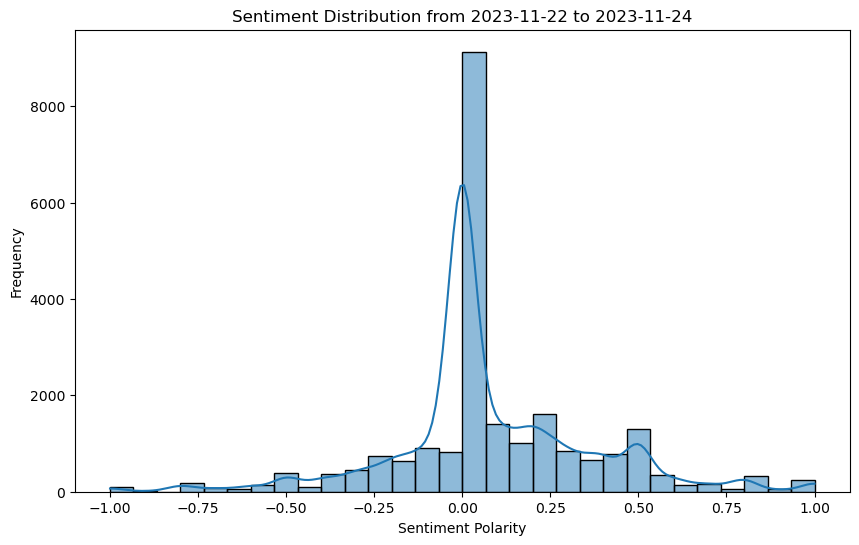

In [20]:
#Broaden Analysis Window
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing a broader date range for analysis
start_date = pd.to_datetime('2023-11-22').date()
end_date = pd.to_datetime('2023-11-24').date()

# Filtering comments within the selected date range
date_range_comments = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Ensure there are comments in the selected date range
if not date_range_comments.empty:
    # Performing sentiment analysis on the comments
    date_range_comments['Sentiment'] = date_range_comments['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Displaying average sentiment of the comments in the date range
    print("\nAverage sentiment from", start_date, "to", end_date, ":", date_range_comments['Sentiment'].mean())

    # Visualizing the sentiment distribution in the date range
    plt.figure(figsize=(10, 6))
    sns.histplot(date_range_comments['Sentiment'], bins=30, kde=True)
    plt.title(f'Sentiment Distribution from {start_date} to {end_date}')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"\nNo comments found in the date range from {start_date} to {end_date}.")



Chapter 4: Sentiment Analysis


In [22]:
# Calculating sentiment polarity for each comment
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Verifying the addition of the Sentiment column
print(df[['Comment', 'Sentiment']].head())


                                             Comment  Sentiment
0  It feels like to me Piers prepares for his int...  -0.229167
1                                  What babies names   0.000000
2  And when Israel fires gun during Ramadan Was t...   0.000000
3          Have a conversation great piece of advice   0.800000
4  Piers Israel isnt genocidal right Theyre not l...   0.057937


Sentiment Distribution:
Sentiment Category
Positive    21125
Neutral     18214
Negative    10846
Name: count, dtype: int64


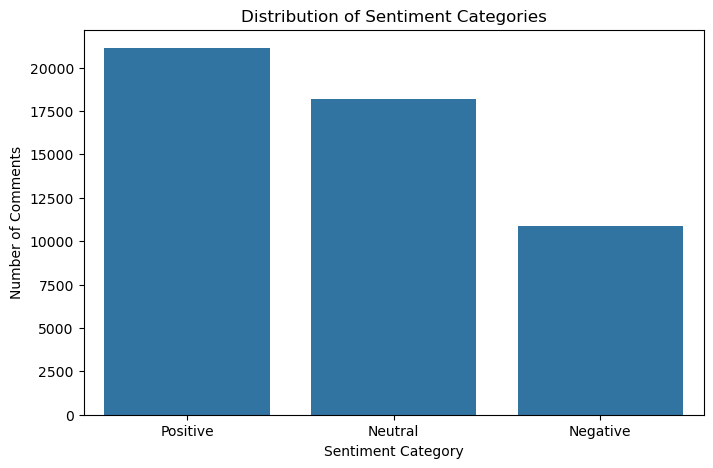

In [23]:
#4.1. Sentiment Classification
# Classifying each comment's sentiment
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the classification function to the 'Sentiment' column
df['Sentiment Category'] = df['Sentiment'].apply(classify_sentiment)

# Displaying the distribution of sentiment categories
sentiment_distribution = df['Sentiment Category'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

# Visualizing the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.show()


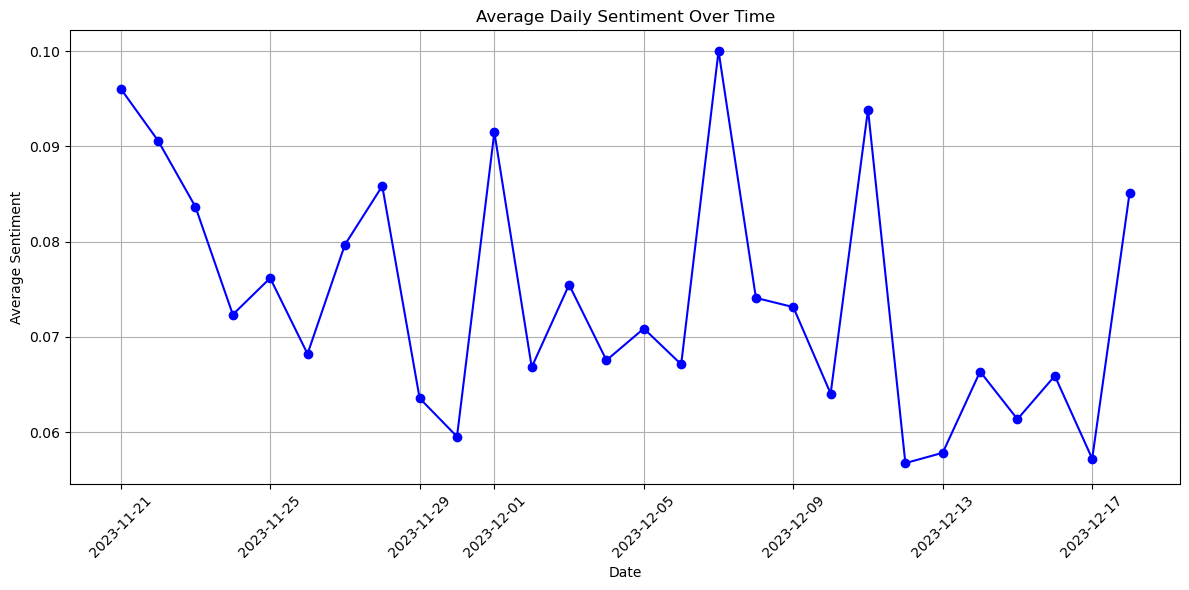

In [30]:
#4.2 Sentiment overtime
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'tate_piers_comments.csv'
df = pd.read_csv(file_path)

# Ensure 'Comment' column is treated as string
df['Comment'] = df['Comment'].astype(str)

# Converting 'Published At' to datetime and extracting the date
df['Published At'] = pd.to_datetime(df['Published At'])
df['Date'] = df['Published At'].dt.date

# Performing sentiment analysis
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Grouping data by date and calculating average sentiment for each day
average_daily_sentiment = df.groupby('Date')['Sentiment'].mean()

# Plotting the average sentiment over time
plt.figure(figsize=(12, 6))
average_daily_sentiment.plot(kind='line', color='blue', marker='o')
plt.title('Average Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [31]:
#Generating a Textual Output of Average Daily Sentiment
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Loading the dataset
file_path = '/kaggle/input/tate-and-morgan-viral-interview-50k-yt-comments/tate_piers_comments.csv'
df = pd.read_csv(file_path)

# Ensure 'Comment' column is treated as string
df['Comment'] = df['Comment'].astype(str)

# Converting 'Published At' to datetime and extracting the date
df['Published At'] = pd.to_datetime(df['Published At'])
df['Date'] = df['Published At'].dt.date

# Performing sentiment analysis
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Grouping data by date and calculating average sentiment for each day
average_daily_sentiment = df.groupby('Date')['Sentiment'].mean()

# Plotting the average sentiment over time
plt.figure(figsize=(12, 6))
average_daily_sentiment.plot(kind='line', color='blue', marker='o')
plt.title('Average Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Converting the average daily sentiment to a DataFrame for a tabular view
average_daily_sentiment_df = average_daily_sentiment.reset_index()
average_daily_sentiment_df.columns = ['Date', 'Average Sentiment']

# Displaying the table
print("Average Daily Sentiment:")
print(average_daily_sentiment_df)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/tate-and-morgan-viral-interview-50k-yt-comments/tate_piers_comments.csv'

In [ ]:
#4.3 Sentiment Contextualization
# Identifying extremely positive and negative comments
extremely_positive = df[df['Sentiment'] > 0.9]
extremely_negative = df[df['Sentiment'] < -0.9]

# Displaying a sample of extreme comments
print("Sample of Extremely Positive Comments:")
print(extremely_positive['Comment'].sample(min(5, len(extremely_positive))))

print("\nSample of Extremely Negative Comments:")
print(extremely_negative['Comment'].sample(min(5, len(extremely_negative))))



Chapter 05: Topic Modeling and Trends 📈

    



In [ ]:
#5.1 Identifying Key Themes
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import string

# Preprocessing the text data
def preprocess_text(text):
    # Tokenize, remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = gensim.utils.simple_preprocess(text)
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return tokens

# Apply preprocessing to the comments
processed_comments = df['Comment'].apply(preprocess_text)

# Creating a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(processed_comments)
corpus = [dictionary.doc2bow(text) for text in processed_comments]

# Applying LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Displaying the identified topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


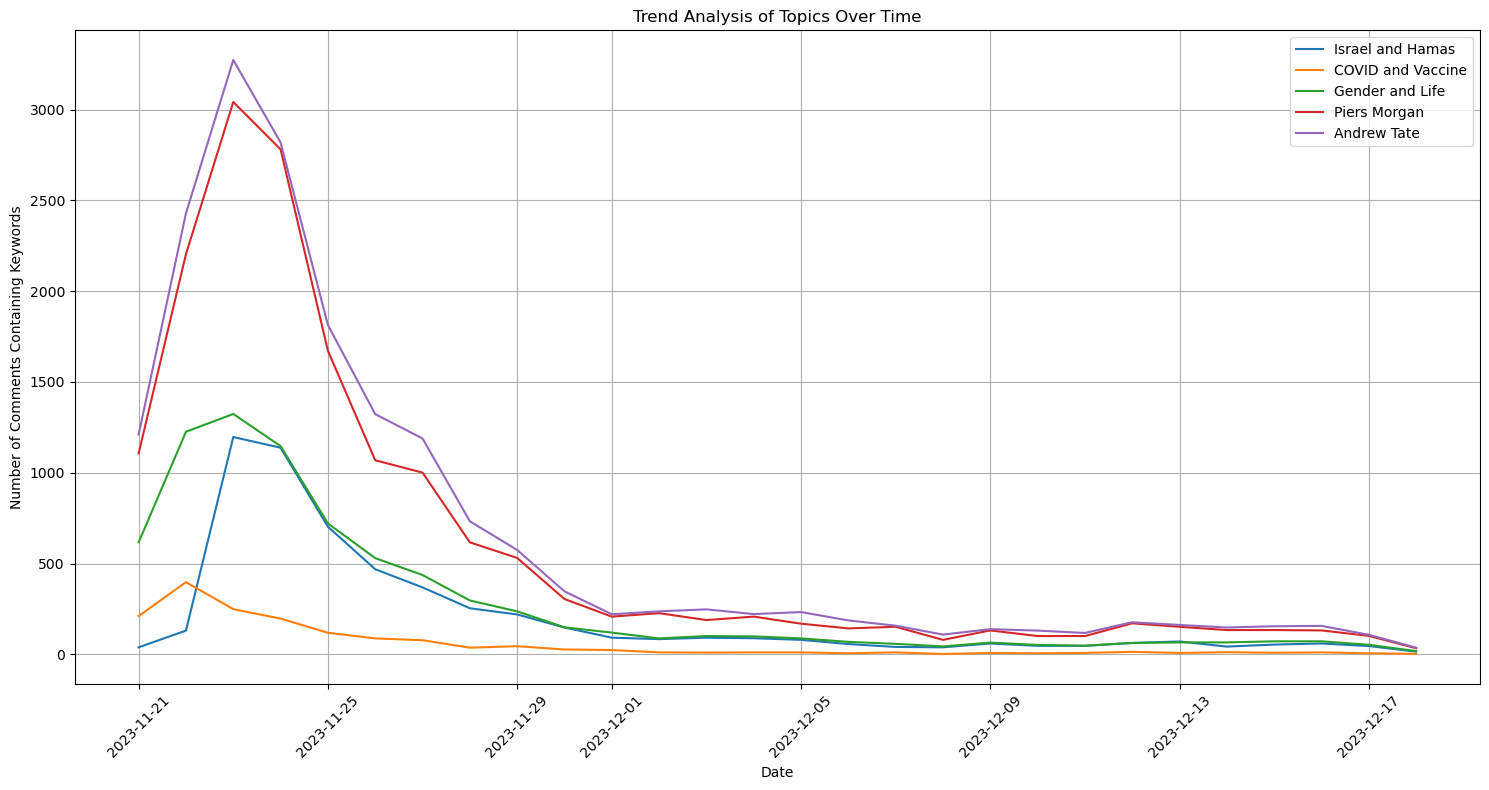

In [35]:
#5.2 Trend Analysis
import matplotlib.pyplot as plt

# Keywords for each topic
topic_keywords = {
    'Israel and Hamas': ['israel', 'hamas'],
    'COVID and Vaccine': ['covid', 'vaccine'],
    'Gender and Life': ['man', 'women'],
    'Piers Morgan': ['piers', 'morgan'],
    'Andrew Tate': ['tate', 'andrew']
}

# Function to count occurrences of keywords in comments
def count_keyword_occurrences(keyword, comments):
    return comments.str.contains(keyword, case=False, na=False).sum()

# Trend analysis over time
for topic, keywords in topic_keywords.items():
    df[topic] = df['Comment'].apply(lambda x: any(keyword in x.lower() for keyword in keywords))

# Grouping by date and summing occurrences
trends_over_time = df.groupby('Date')[list(topic_keywords.keys())].sum()

# Plotting trends
plt.figure(figsize=(15, 8))
for topic in topic_keywords.keys():
    plt.plot(trends_over_time.index, trends_over_time[topic], label=topic)

plt.title('Trend Analysis of Topics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments Containing Keywords')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


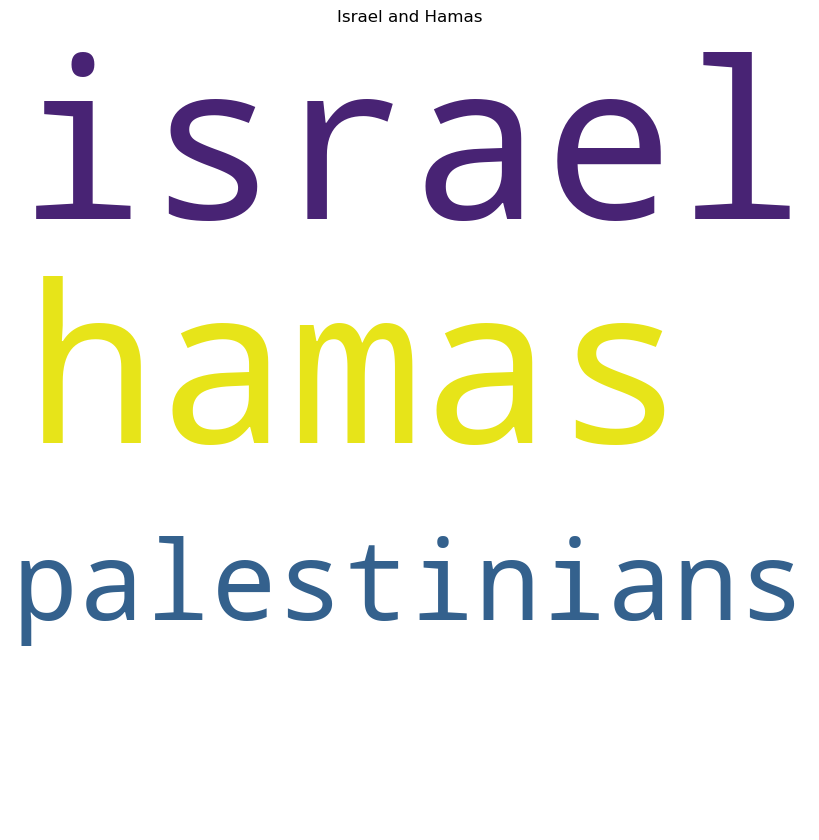

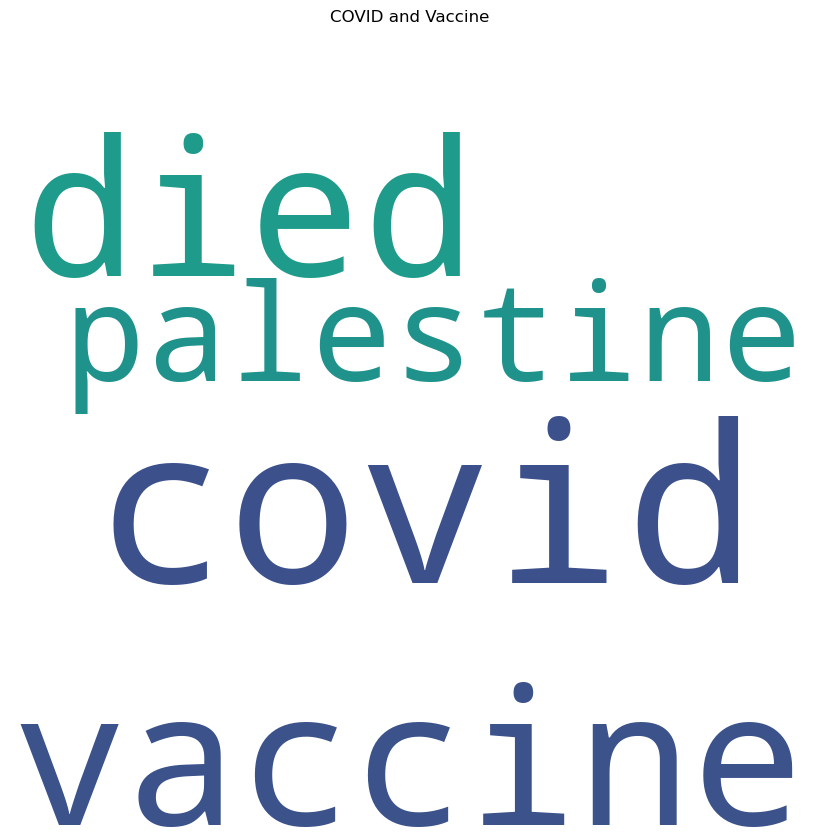

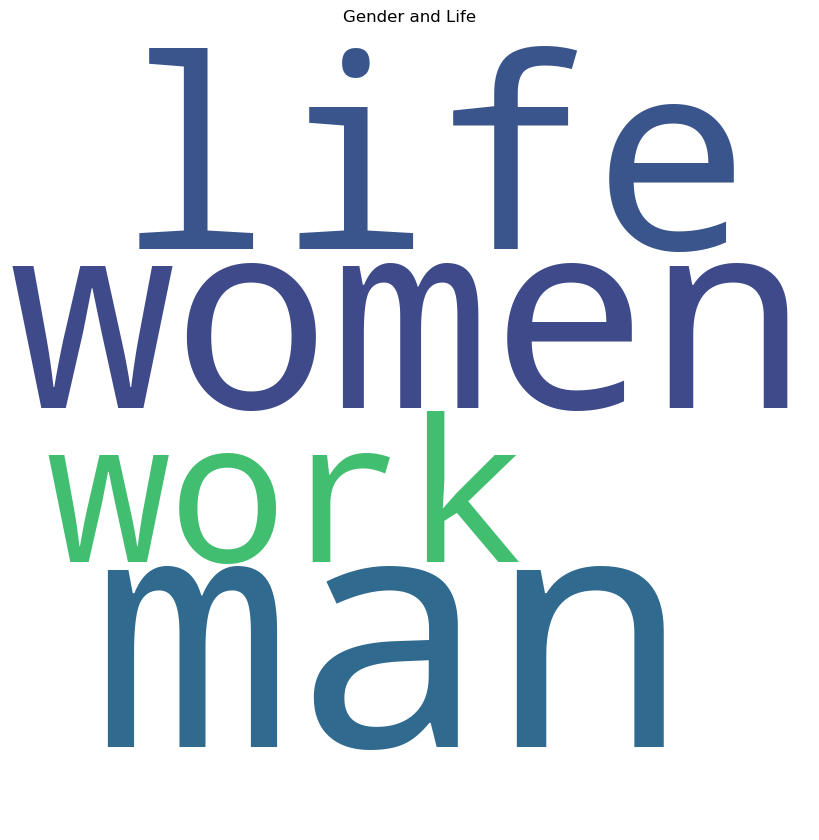

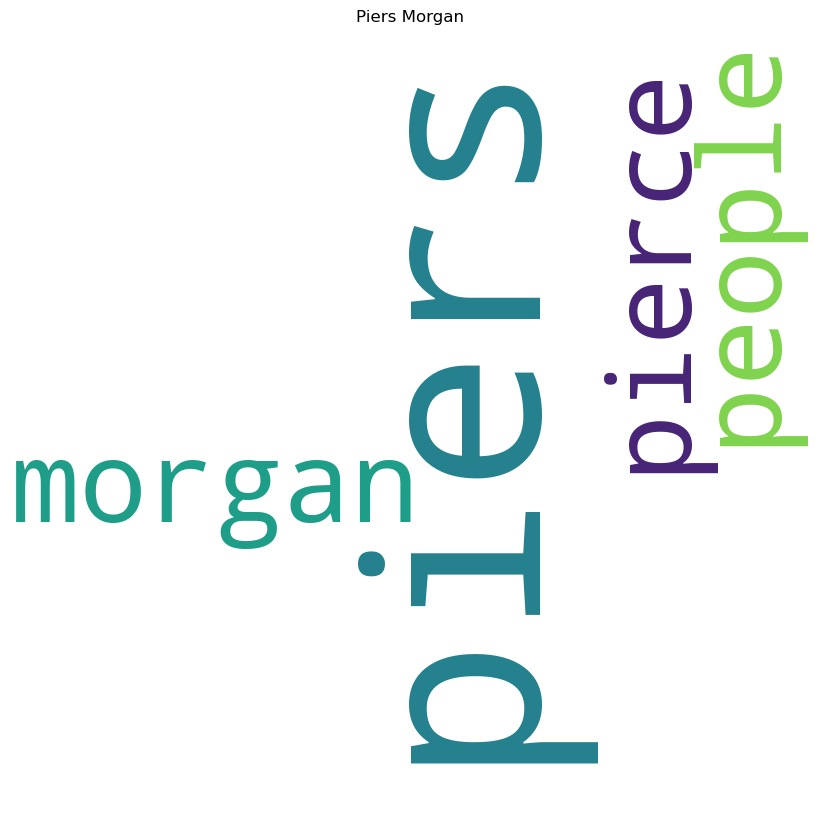

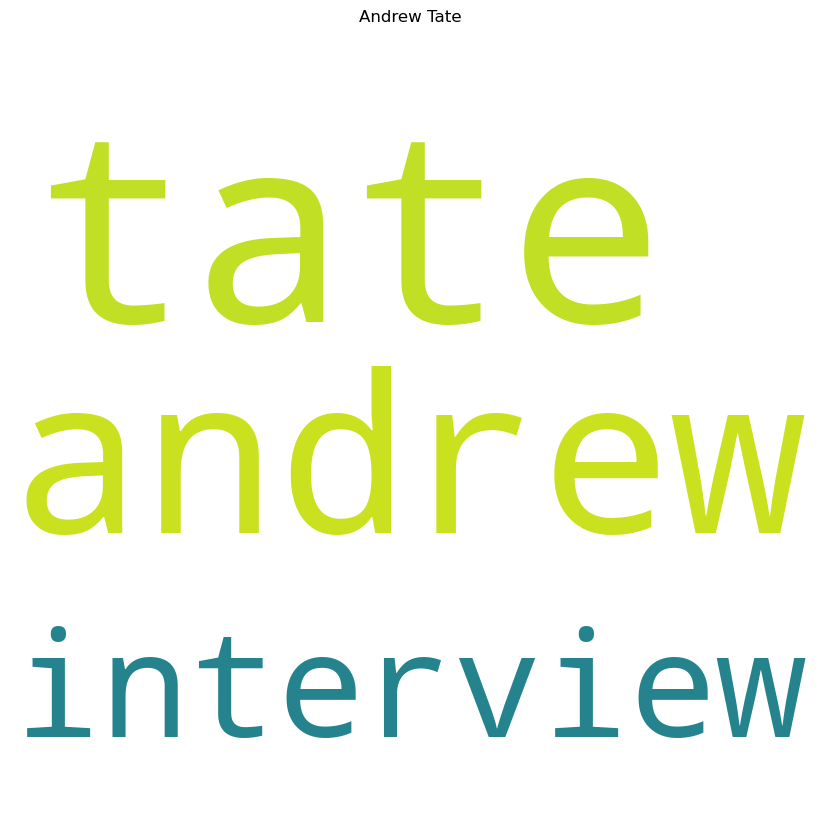

In [37]:
#5.3 Word Cloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)

    # Plotting the WordCloud                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()

# Keywords for each topic
topic_keywords = {
    'Israel and Hamas': 'israel hamas palestinians',
    'COVID and Vaccine': 'covid vaccine died palestine',
    'Gender and Life': 'man women life work',
    'Piers Morgan': 'piers morgan pierce people',
    'Andrew Tate': 'tate andrew interview like'
}

# Generating word clouds for each topic
for topic, keywords in topic_keywords.items():
    generate_word_cloud(keywords, topic)


Chapter 6: Hate Speech Detection ⚠️

 



In [40]:
#6.1.Identifying Toxic Comments
# List of potential hate speech keywords
hate_speech_keywords = ['hate', 'kill', 'stupid', 'idiot', 'dumb', 'racist', 'nazi', 'terrorist']

# Function to identify toxic comments
def is_toxic(comment):
    for keyword in hate_speech_keywords:
        if keyword in comment.lower():
            return True
    return False

# Applying the function to the dataset
df['Toxic'] = df['Comment'].apply(is_toxic)

# Counting the number of toxic comments
num_toxic_comments = df['Toxic'].sum()
print(f"Number of potentially toxic comments: {num_toxic_comments}")


Number of potentially toxic comments: 5434


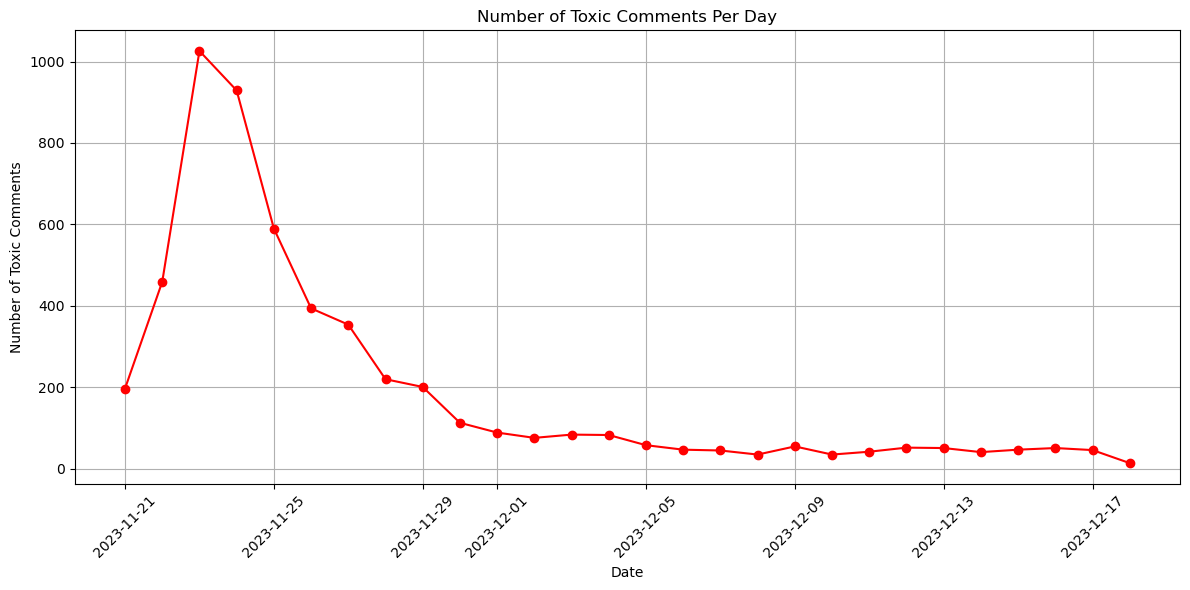

In [42]:
#6.2 Patterns in Hate Speech
# Grouping data by date and counting toxic comments per day
toxic_comments_per_day = df.groupby('Date')['Toxic'].sum()

# Plotting the number of toxic comments per day
plt.figure(figsize=(12, 6))
toxic_comments_per_day.plot(kind='line', color='red', marker='o')
plt.title('Number of Toxic Comments Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Toxic Comments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
# Grouping data by date and counting toxic comments per day
toxic_comments_per_day = df.groupby('Date')['Toxic'].sum().reset_index()

# Renaming columns for clarity
toxic_comments_per_day.columns = ['Date', 'Number of Toxic Comments']

# Displaying the table
print("Toxic Comments Patterns:")
print(toxic_comments_per_day)


Toxic Comments Patterns:
          Date  Number of Toxic Comments
0   2023-11-21                       197
1   2023-11-22                       459
2   2023-11-23                      1026
3   2023-11-24                       929
4   2023-11-25                       590
5   2023-11-26                       394
6   2023-11-27                       354
7   2023-11-28                       220
8   2023-11-29                       201
9   2023-11-30                       113
10  2023-12-01                        89
11  2023-12-02                        76
12  2023-12-03                        84
13  2023-12-04                        83
14  2023-12-05                        58
15  2023-12-06                        47
16  2023-12-07                        45
17  2023-12-08                        35
18  2023-12-09                        55
19  2023-12-10                        35
20  2023-12-11                        42
21  2023-12-12                        52
22  2023-12-13                  

In [46]:
#6.3 Correlation with sentiments
# Calculating correlation between sentiment and toxic comments
correlation = df[['Sentiment', 'Toxic']].corr()
print("Correlation between Sentiment and Toxic Comments:")
print(correlation)


Correlation between Sentiment and Toxic Comments:
           Sentiment     Toxic
Sentiment   1.000000 -0.135567
Toxic      -0.135567  1.000000



### Chapter 7: Conclusion and Insights 🎯

#### 7.1 Key Takeaways

1. **Sentiment Analysis**: The dataset revealed a generally positive sentiment, with an average sentiment score hovering around 0.078 over various dates. Notably, the sentiment was mildly positive despite the presence of divisive topics.

2. **Topic Modeling**: Key themes identified included political and regional issues (Israel and Hamas), health concerns (COVID and Vaccine), gender discussions, and significant focus on the personalities involved (Piers Morgan and Andrew Tate).

3. **Trend Analysis**: Peaks in toxic comments were observed around specific dates (e.g., 2023-11-23 and 2023-11-24), suggesting a correlation with the interview's content or related events. 

4. **Hate Speech Detection**: A mild negative correlation (-0.135) between sentiment and toxic comments indicates that negativity in sentiment slightly increases the likelihood of comments being toxic.

#### 7.2 Potential Applications

- **Social Media Monitoring**: Insights from this analysis can aid in developing strategies for monitoring and moderating online discussions, especially on social media platforms.
  
- **Content Strategy**: Understanding public sentiment and key discussion themes can inform content creation and communication strategies for media personalities and organizations.

- **Academic Research**: The dataset provides a rich ground for academic studies in digital communication, public opinion analysis, and media studies.

#### 7.3 Limitations and Future Work

- **Methodological Limitations**: The reliance on keyword-based methods for hate speech detection and basic sentiment analysis has its limitations, as it may not fully capture the nuances of human language.

- **Scope for Advanced Analysis**: Employing more sophisticated NLP techniques and machine learning models can provide deeper insights, especially in detecting hate speech and understanding complex sentiments.

- **Longitudinal Studies**: Future work could involve a longitudinal analysis to understand how public sentiment and discussion themes evolve over longer periods.




### 8.0 Acknowledgments and References 👏

#### 8.1 Data Source
This analysis was conducted using data sourced from the YouTube channel "Piers Morgan Uncensored," specifically focusing on the comments section of the interviews with Andrew Tate. The dataset represents a wide range of public opinions and sentiments, providing a valuable resource for understanding digital discourse.

#### 8.2 Tools and Resources Used
The analysis utilized various tools and libraries to process and analyze the data:

- **Python**: The primary programming language used for data manipulation and analysis.
- **Pandas**: For data handling and preprocessing.
- **NLTK and TextBlob**: Employed for natural language processing tasks like sentiment analysis.
- **Gensim**: Used for topic modeling and identifying key themes within the data.
- **Matplotlib and Seaborn**: For data visualization and graphical representation of trends.
- **Jupyter Notebook**: The platform used for compiling and presenting the analysis.

#### 8.3 Special Thanks
Special thanks to the academic and data science communities for providing the tools and methodologies that made this analysis possible. Their continuous contributions to open-source software and data science education are invaluable assets to researchers and analysts worldwide.
